In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import HumanMessage,BaseMessage

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.prompts import PromptTemplate




In [74]:
llm=ChatGoogleGenerativeAI(model="gemini-2.0-flash")
config={
    "configurable":{
        "thread_id":"joke_workflow_1"
    }
}

In [75]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanaction:str
    

In [76]:



def generate_joke(state:JokeState):
    template="Tell me a joke about {topic} in less than 20 words."
    prompt=PromptTemplate(template=template,input_variables=["topic"])
    chain = prompt|llm|StrOutputParser()
    joke=chain.invoke({"topic":state["topic"]})
    return {"joke":joke}
    
    
    
    
    

In [77]:
def generate_explanation(state:JokeState):
    template="Explain the following joke in less than 50 words: {joke}"
    prompt=PromptTemplate(template=template,input_variables=["joke"])
    chain = prompt|llm|StrOutputParser()
    explanation=chain.invoke({"joke":state["joke"]})
    return {"explanaction":explanation}

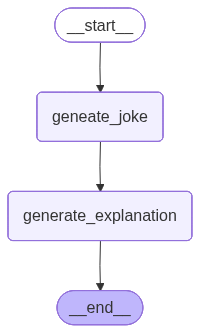

In [78]:
checkpointer=InMemorySaver()
graph=StateGraph(JokeState)
graph.add_node("geneate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,"geneate_joke")
graph.add_edge("geneate_joke","generate_explanation")   
graph.add_edge("generate_explanation",END)

workflow=graph.compile(checkpointer=checkpointer)
workflow

In [79]:
initial_state={
    "topic":"play"
}

workflow.invoke(initial_state,config=config)




{'topic': 'play',
 'joke': "Why don't scientists trust atoms? \nBecause they make up everything!",
 'explanaction': 'The joke plays on the double meaning of "make up." Scientists don\'t trust atoms because atoms literally compose everything (matter). The joke also implies atoms are untrustworthy because "make up" can mean to fabricate or lie.'}

In [80]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'play', 'joke': "Why don't scientists trust atoms? \nBecause they make up everything!", 'explanaction': 'The joke plays on the double meaning of "make up." Scientists don\'t trust atoms because atoms literally compose everything (matter). The joke also implies atoms are untrustworthy because "make up" can mean to fabricate or lie.'}, next=(), config={'configurable': {'thread_id': 'joke_workflow_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0bd454-305c-6f93-8002-48e52c5aad45'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-09T08:22:42.333262+00:00', parent_config={'configurable': {'thread_id': 'joke_workflow_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0bd454-27ea-68e2-8001-d4a80e35bfdf'}}, tasks=(), interrupts=())

In [81]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'play', 'joke': "Why don't scientists trust atoms? \nBecause they make up everything!", 'explanaction': 'The joke plays on the double meaning of "make up." Scientists don\'t trust atoms because atoms literally compose everything (matter). The joke also implies atoms are untrustworthy because "make up" can mean to fabricate or lie.'}, next=(), config={'configurable': {'thread_id': 'joke_workflow_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0bd454-305c-6f93-8002-48e52c5aad45'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-11-09T08:22:42.333262+00:00', parent_config={'configurable': {'thread_id': 'joke_workflow_1', 'checkpoint_ns': '', 'checkpoint_id': '1f0bd454-27ea-68e2-8001-d4a80e35bfdf'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'play', 'joke': "Why don't scientists trust atoms? \nBecause they make up everything!"}, next=('generate_explanation',), config={'configurable': {'thread_id': 'joke_workflow_1', 'che